
> setwd("/users/genomics/xoel/codebases/co_new/results/")

> plotdir <- "Plots/"

> dir.create(plotdir, showWarnings = F)

> library(ggplot2)

> library(ggh4x)

> library(ggpubr)

> library(ggrepel)

> library(tidyr)

> library(dplyr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





> fig <- function(width, heigth) {
+     options(repr.plot.width = width, repr.plot.height = heigth)
+ }

> CellTypeAnnot <- c("vRG E", "vRG L", "tRG", "oRG E", 
+     "oRG L", "nIPC", "Neu E", "GluN3", "GluN1", "GluN2", "GluN7", 
+     "GluN5", "GluN4", " ..." ... [TRUNCATED] 

> CellTypeOrder <- c("RGC", "vRG", "vtRG", "oRG", "RG E", 
+     "RG L", "vRG E", "vRG L", "tRG", "oRG E", "oRG L", "Neural", 
+     "GluN", "nIPC", " ..." ... [TRUNCATED] 

> CellTypeLabels <- CellTypeOrder

> CellTypeColor <- setNames(c("#bec1d4", "#7d87b9", 
+     "#023fa5", "#d6bcc0", "#bb7784", "#8e063b", "#b5bbe3", "#8595e1", 
+     "#4a6fe3", "#e6afb ..." ... [TRUNCATED] 

> ctinfo <- data.frame(hex = CellTypeColor, Name = factor(names(CellTypeColor))) %>% 
+     mutate(`Common label` = Name)

> plot.celltype <- ggplot(data = ctinfo, mapping = aes(x = 0, 
+     y = Name, fill = `Common label`)) + geom_tile() + scale_fill_manual(values = Cell .... [TRUNCATED] 

> plot.celltype

> write.csv(ctinfo, file =

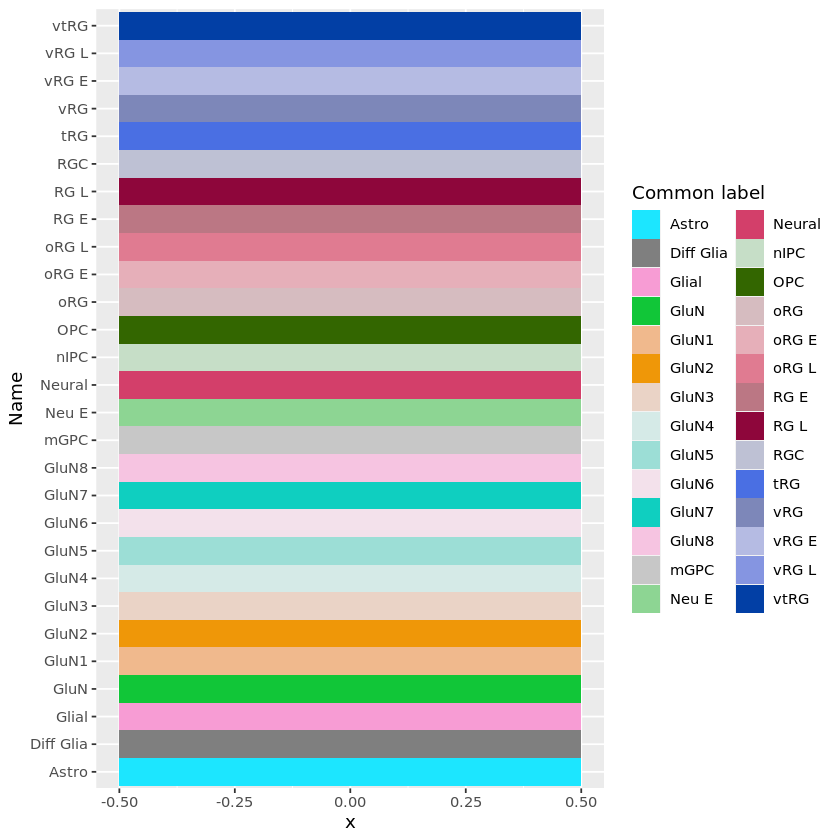

In [1]:
source('0_Rplots.R', echo=T)

In [2]:
pdir <- paste0(getwd(), '/Plots/ScoreComparison/')
dir.create(pdir, showWarnings = F, recursive = T)
setwd(pdir)

In [3]:
tf_only <- T

In [4]:
print(table(unique(NetworkScores)$Gene %in% tf_genes))
if (tf_only){
    print('Plotting only TFs')
    NetworkScores <- subset(NetworkScores, Gene %in% tf_genes)
    pdir <- paste0(pdir, 'tf_only/')
    dir.create(pdir, showWarnings = F, recursive = T)
    setwd(pdir)
} else {
    pdir <- paste0(pdir, 'all_genes/')
    dir.create(pdir, showWarnings = F, recursive = T)
    setwd(pdir)
}


FALSE  TRUE 
17015  5514 
[1] "Plotting only TFs"


# Check correlation of same cell types in different subsets

In [5]:
ScoreInclude

[1] "degree_all"             "degree_centrality_all"  "degree_in"             
 [4] "degree_centrality_in"   "degree_out"             "degree_centrality_out" 
 [7] "betweenness_centrality" "eigenvector_centrality" "connectivity"          
[10] "participation"

In [43]:
pdf('CellType correlation accross subsets.pdf', width=15, height=10)

for (score in ScoreInclude){
    print(score)
    
    score.df <- NetworkScores[, c('Gene', 'cell.type', 'Sample', score)] %>% 
        reshape2::dcast(formula = 'Gene + cell.type ~ Sample', value.var=score)

    score.df <- score.df[apply(score.df, 1, function(x){sum(is.na(x))<=1}),]

    score.df[is.na(score.df)] <- 0


    p1 <- ggscatter(score.df, x = "RGCmaturation", y = "Gliogenesis", 
              add = "reg.line", conf.int = TRUE, 
              cor.coef = TRUE, cor.method = "pearson",
              xlab = "RGCmaturation", ylab = "Gliogenesis") +
        facet_wrap(vars(cell.type), nrow = 1, scales='free') + ggtitle(ScoreLabels[score])
    p2 <- ggscatter(score.df, x = "RGCmaturation", y = "NeuralPCW20", 
              add = "reg.line", conf.int = TRUE, 
              cor.coef = TRUE, cor.method = "pearson",
              xlab = "RGCmaturation", ylab = "NeuralPCW20") +
        facet_wrap(vars(cell.type), nrow = 1, scales='free') 
    p3 <- ggscatter(score.df, x = "Gliogenesis", y = "NeuralPCW20", 
              add = "reg.line", conf.int = TRUE, 
              cor.coef = TRUE, cor.method = "pearson",
              xlab = "Gliogenesis", ylab = "NeuralPCW20") +
        facet_wrap(vars(cell.type), nrow = 1, scales='free') 

    plot(cowplot::plot_grid(p1,p2,p3, ncol = 1, nrow=3))

    p1 <- ggscatter(score.df, x = "NeuralPCW20", y = "NeuralPCW21", 
              add = "reg.line", conf.int = TRUE, 
              cor.coef = TRUE, cor.method = "pearson",
              xlab = "NeuralPCW20", ylab = "NeuralPCW21") +
        facet_wrap(vars(cell.type), nrow = 1, scales='free') + ggtitle(ScoreLabels[score])
    p2 <- ggscatter(score.df, x = "NeuralPCW21", y = "NeuralPCW24", 
              add = "reg.line", conf.int = TRUE, 
              cor.coef = TRUE, cor.method = "pearson",
              xlab = "NeuralPCW21", ylab = "NeuralPCW24") +
        facet_wrap(vars(cell.type), nrow = 1, scales='free') 
    p3 <- ggscatter(score.df, x = "NeuralPCW20", y = "NeuralPCW24", 
              add = "reg.line", conf.int = TRUE, 
              cor.coef = TRUE, cor.method = "pearson",
              xlab = "NeuralPCW20", ylab = "NeuralPCW24") +
        facet_wrap(vars(cell.type), nrow = 1, scales='free') 

    plot(cowplot::plot_grid(p1,p2,p3, ncol = 1, nrow=3))

}
dev.off()

[1] "degree_all"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


[1] "degree_centrality_all"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


[1] "degree_in"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


[1] "degree_centrality_in"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


[1] "degree_out"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


[1] "degree_centrality_out"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


[1] "betweenness_centrality"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


[1] "eigenvector_centrality"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


[1] "connectivity"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


[1] "participation"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


png 
  2

## Genes for which we do not have scores in gliogenesis, and we have them for RGC mat

In [7]:
unique(score.df[score.df$Gliogenesis==0 & score.df$RGCmaturation != 0,]$Gene)

[1] "CEBPD"  "DDIT3"  "NFATC2" "NFIA"   "SOX11"

# Initial heatmap

## Cluster perturbation  
Important to match formula to expected axes in plots

In [8]:
cluster_genes <- function(df, score){
    
    df$Gene <- as.character(df$Gene)
    cluster.ct.df <- reshape2::dcast(
        df,
        'Gene ~ cell.type',
        value.var = score)

    cluster.ct.df <- data.frame(cluster.ct.df[,-1], row.names = cluster.ct.df[,1])
    cluster.ct.df[is.na(cluster.ct.df)] <- 0
    cluster.ct.hc <- hclust(dist(cluster.ct.df, 
                              method = 'euclidean'), 
                         method = 'ward.D2')
    cluster.ct.genes <- cluster.ct.hc[['labels']][cluster.ct.hc[['order']]]
    return(cluster.ct.genes)
}

## Heatmap score

In [9]:
library(viridis)

Loading required package: viridisLite



In [10]:
do.heatscore <- function(df, sorted_genes){

    p <- ggplot(df, aes(x=cell.type, y=factor(Gene, levels=rev(sorted_genes)), fill=plot.score)) +
      geom_tile(color='grey', linewidth=0.1) + 
      scale_fill_viridis_c(name=ScoreLabels[score], 'rocket', direction = -1) + 

      ylab('Gene') +
      xlab('Cell type') +
      ggtitle(SampleLabels[sample], subtitle=paste(sample, ScoreLabels[score])) +

      theme_pubr(legend = 'bottom') +
      labs_pubr(base_family = 'ArialMT') +
      guides(fill = guide_colorbar(barwidtht = 1)) +

      theme(
        panel.spacing = unit(0.2, "lines"),
        # strip.background = element_blank(),
        # strip.placement = 'outside',
        panel.background = element_blank(),
        axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5),
        axis.text.y = element_text(),
        # legend.box="vertical",
        legend.text = element_text(angle=90, hjust=1, vjust=0.5))
    return(p)
}

# Option 1: Heatmap and confusions

In [11]:
library(doParallel)

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [12]:
dir.create('heatmaps', showWarnings = F)
for (sample in unique(NetworkScores$Sample)){
    
    sample.df <- subset(NetworkScores, Sample == sample)
    sample.genes <- unique(sample.df$Gene)    
    
    cl <- parallel::makeForkCluster(length(ScoreInclude))
    doParallel::registerDoParallel(cl)
     
    wait_res <- foreach(score = ScoreInclude, 
                        .verbose = T ) %dopar% {
    # for (score in ScoreInclude){
    
        for (scale.score in c(FALSE)){ # we do not want scaling
            
            for (recluster in c(TRUE, FALSE)){

                for (gene.subset in c('Cores', 'Regulons', 
                                      'Disease', 'Cores+Disease',
                                      'all')){
                    
                    
                    label <- paste(sample, score, sep = '.')
                    
                    plot.df <- sample.df
                    plot.df$plot.score <- plot.df[,score, drop=T]
                    sorted_genes <- sample.genes

                    if (gene.subset=='Cores'){
                        sorted_genes <- sorted_genes[sorted_genes%in%regulon_cores]
                        plot.df <- subset(plot.df, Gene %in% regulon_cores)
                        label <- paste(label, gene.subset, sep = '.')
                        
                    } else if (gene.subset=='Regulons'){
                        sorted_genes <- sorted_genes[sorted_genes%in%regulon_genes]
                        plot.df <- subset(plot.df, Gene %in% regulon_genes)
                        label <- paste(label, gene.subset, sep = '.')
                    } else if (gene.subset=='Disease'){
                        sorted_genes <- sorted_genes[sorted_genes%in%disease_genes]
                        plot.df <- subset(plot.df, Gene %in% disease_genes)
                        label <- paste(label, gene.subset, sep = '.')
                    } else if (gene.subset=='Cores+Disease'){
                        subset.genes <- union(disease_genes, regulon_cores)
                        sorted_genes <- sorted_genes[sorted_genes%in%subset.genes]
                        plot.df <- subset(plot.df, Gene %in% subset.genes)
                        label <- paste(label, gene.subset, sep = '.')
                    } else if (gene.subset=='all'){
                        sorted_genes <- sorted_genes
                        label <- paste(label, gene.subset, sep = '.')
                    }

                    if (scale.score){
                        plot.df <- plot.df %>% group_by(Gene) %>% 
                                       mutate(plot.score=scales::rescale(x = plot.score, to = c(0,1)))
                        label <- paste(label, 'Scaled', sep = '.')
                    }

                    if (recluster){
                        sorted_genes <- cluster_genes(plot.df, score = score)
                    } else {
                        sorted_genes <- gene.peak.order[gene.peak.order%in%sorted_genes]
                        plot.df <- subset(plot.df, Gene %in% sorted_genes)
                        label <- paste(label, 'PeakSorted', sep = '.')
                    }

                    print(label)
                    n.cts <- length(unique(plot.df$cell.type))
                    n.gs <- length(unique(plot.df$Gene))
                    print(paste('# CT', n.cts, '| # genes', n.gs))

                    
                    htmp <- do.heatscore(plot.df, sorted_genes = sorted_genes)

                    pdf(file=paste0('HeatmapScore.', label, '.pdf'), 
                        width=n.cts*0.15+6, 
                        height=n.gs*0.16+3.4)#max(10, n.gs/10)) ## change this for an actual formula :) 
                    plot(htmp)
                    dev.off()



                    dis.conf.plot <- do.conf.dis.plot(genes=sorted_genes)
                    peak.conf.plot <- do.conf.peak.plot(genes=sorted_genes)

                    comb.plot <- cowplot::plot_grid(
                        htmp, 
                        peak.conf.plot + theme(axis.text.y=element_blank(),axis.title.y=element_blank()), 
                        dis.conf.plot+ theme(axis.text.y=element_blank(),axis.title.y=element_blank()),

                        nrow=1, align='h', axis='tb', 

                        rel_widths=c(1,1,1))

                    pdf(file=paste0('heatmaps/HeatmapScore.', label, '.Combined.pdf'), 
                        width=n.cts*0.15+9, 
                        height=n.gs*0.16+3.4)#max(10, n.gs/10)) ## change this for an actual formula :) 
                    plot(comb.plot)
                    dev.off()
                    
                }
            }
        }        
    }
    parallel::stopCluster(cl)

}

discovered package(s): 
automatically exporting the following variables from the local environment:
  cluster_genes, dis.conf.cols, DisCores, disease_genes, Diseases, DisTargets, do.conf.dis.plot, do.conf.peak.plot, do.heatscore, gene.peak.order, get.conf.dis.df, get.conf.peak.df, peak.conf.cols, PeakCores, Peaks, PeakTargets, regulon_cores, regulon_genes, sample, sample.df, sample.genes, SampleLabels, ScoreLabels 
explicitly exporting package(s): 
numValues: 10, numResults: 0, stopped: TRUE
got results for task 1
numValues: 10, numResults: 1, stopped: TRUE
returning status FALSE
got results for task 2
numValues: 10, numResults: 2, stopped: TRUE
returning status FALSE
got results for task 3
numValues: 10, numResults: 3, stopped: TRUE
returning status FALSE
got results for task 4
numValues: 10, numResults: 4, stopped: TRUE
returning status FALSE
got results for task 5
numValues: 10, numResults: 5, stopped: TRUE
returning status FALSE
got results for task 6
numValues: 10, numResults: 6, 

# Option 2: cell type comparison per disease

In [16]:
get.expand.dis.df <- function(df){
    
    dis.genes <- subset(get.conf.dis.df(unique(df$Gene)), Value!='None')
    dis.list <- split(dis.genes[,c('Gene', 'Value')], dis.genes$Disease)

    dis.df <- do.call('rbind', 
                      lapply(
                          names(dis.list),
                          function(x){

                              dgenes <- unique(dis.list[[x]]$Gene)
                              ddf <- subset(df, Gene %in% dgenes)

                              ddf$Disease <- x
                              ddf$Value <- dis.list[[x]]$Value[match(x=ddf$Gene, dis.list[[x]]$Gene)]
                              ddf

                          })) %>% mutate(Disease=factor(Disease, names(dis.list)))
    return(dis.df)
}


In [17]:
network.dis.df <- get.expand.dis.df(subset(NetworkScores, Sample %in% SampleInclude))

In [18]:
# network.dis.df$cell.type.label <- factor(CellTypeLabels[as.character(network.dis.df$cell.type)], CellTypeOrder)
network.dis.df$cell.type.label <- factor(as.character(network.dis.df$cell.type), CellTypeOrder)

In [19]:
network.dis.df$is.core <- network.dis.df$Gene %in% regulon_cores

## Boxplot

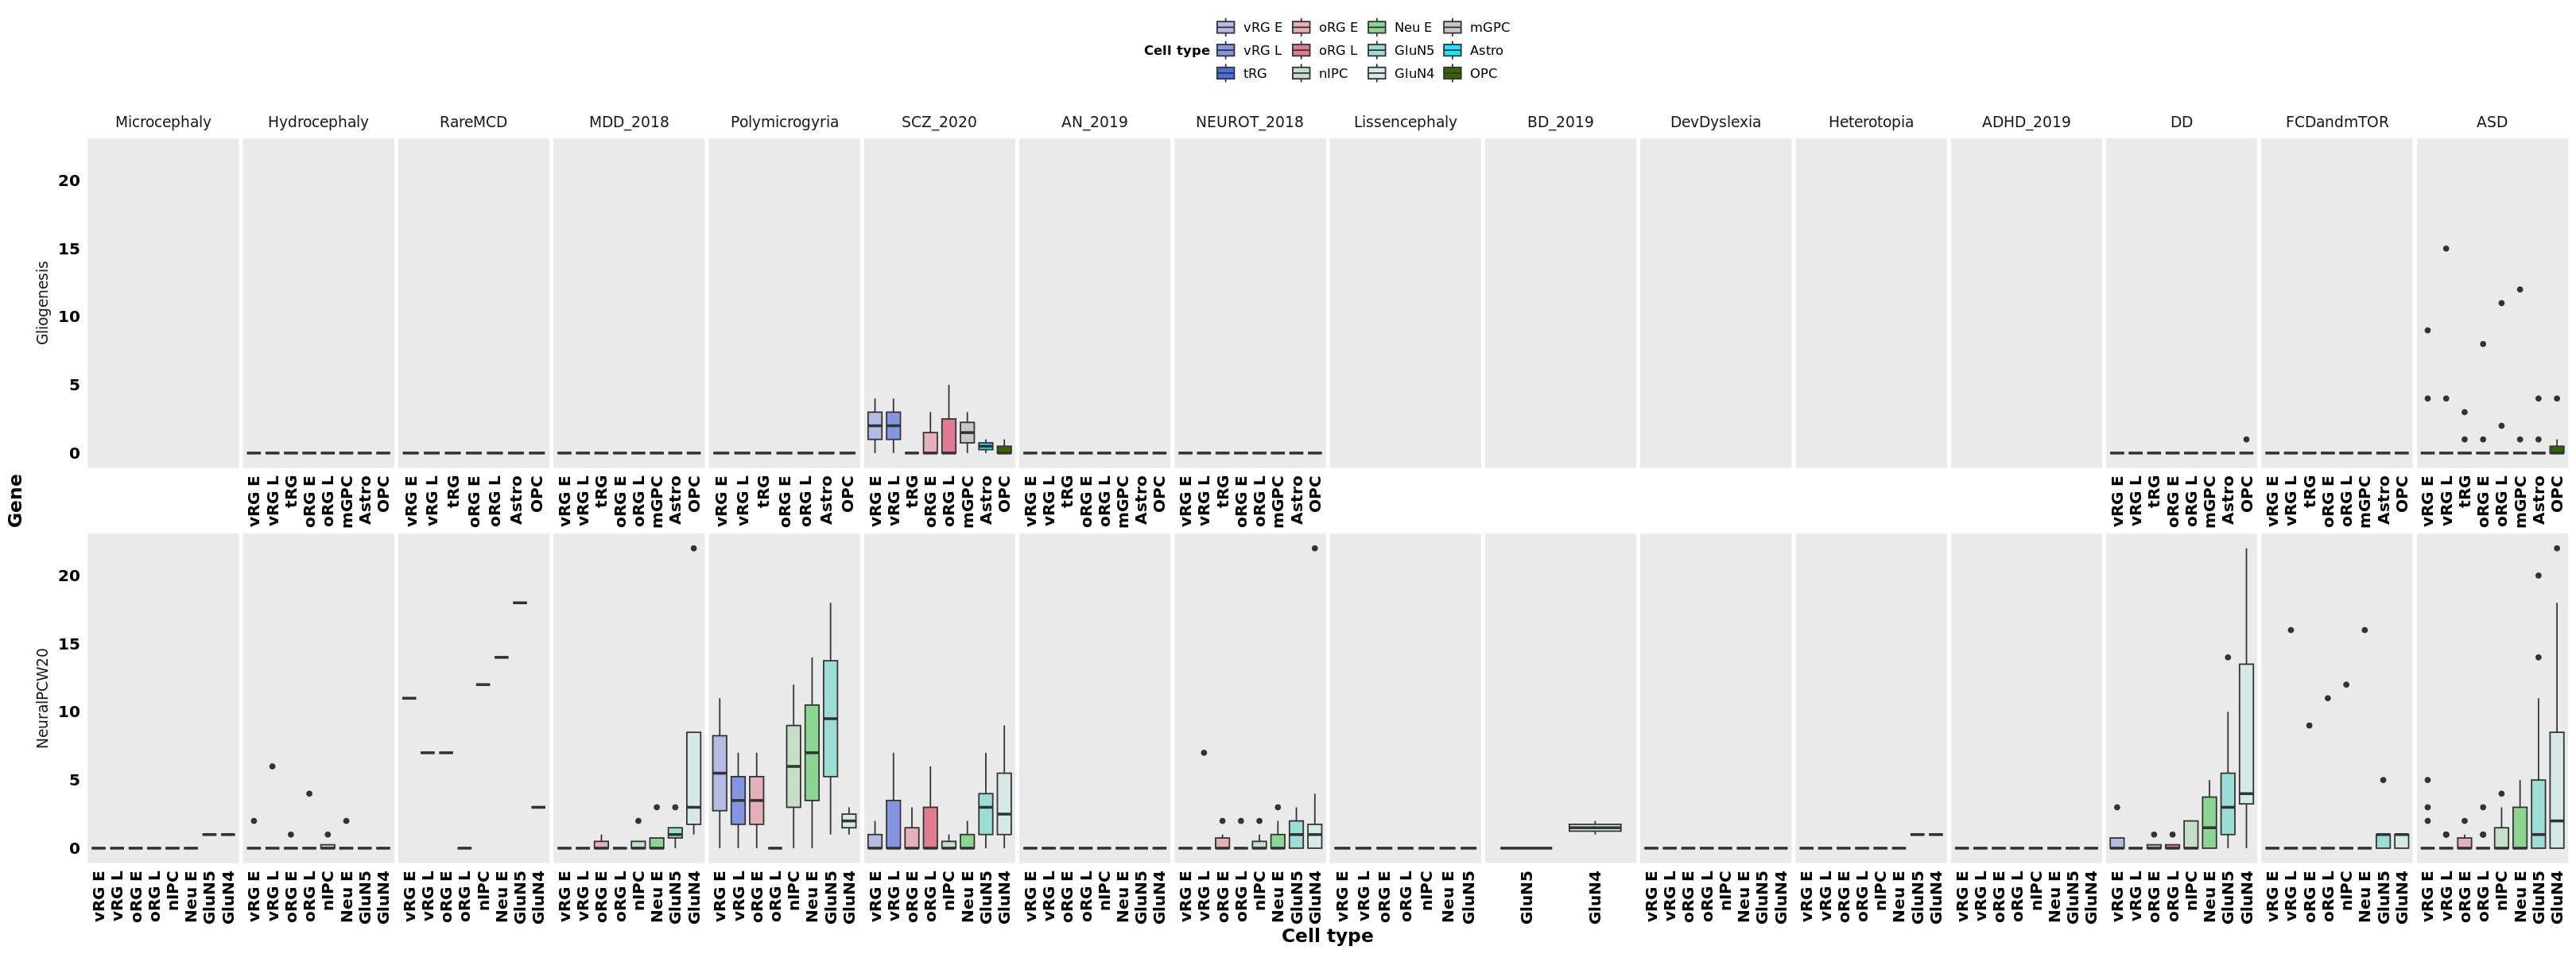

In [16]:
fig(27,10)
p <- ggplot(network.dis.df, 
            aes(x=cell.type.label, 
                y=degree_in,
                # color=Value
                fill=cell.type.label
               )) +
    facet_grid2(cols=vars(Disease), rows=vars(Sample), scales='free_x', independent = 'x', switch='y') +

    # geom_point(
    #     alpha=0.8,
    #     position=position_jitter(height=0)
    # ) + 

    geom_boxplot(
    ) + 
    scale_fill_manual('Cell type', values = CellTypeColor) +
  # scale_fill_viridis_c(name=ScoreLabels[score], 'rocket', direction = -1) + 

  ylab('Gene') +
  xlab('Cell type') +
  # ggtitle(SampleLabels[sample], subtitle=paste(sample, ScoreLabels[score])) +

  theme_pubr(legend = 'top') +
  labs_pubr(base_family = 'ArialMT') +
  # guides(fill = guide_colorbar(barwidtht = 1)) +

  theme(
    panel.spacing = unit(0.2, "lines"),
    strip.background = element_blank(),
    strip.placement = 'outside',
    panel.background  = element_rect(fill='#eaeaea'),element_blank(),
    axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5),
    axis.text.y = element_text(),
    # legend.box="vertical",
    # legend.text = element_text(angle=90, hjust=1, vjust=0.5)
  )
p


## Violin

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`
Caused by error in `$<-.data.frame`:
! replacement has 1 row, data has 0”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning me

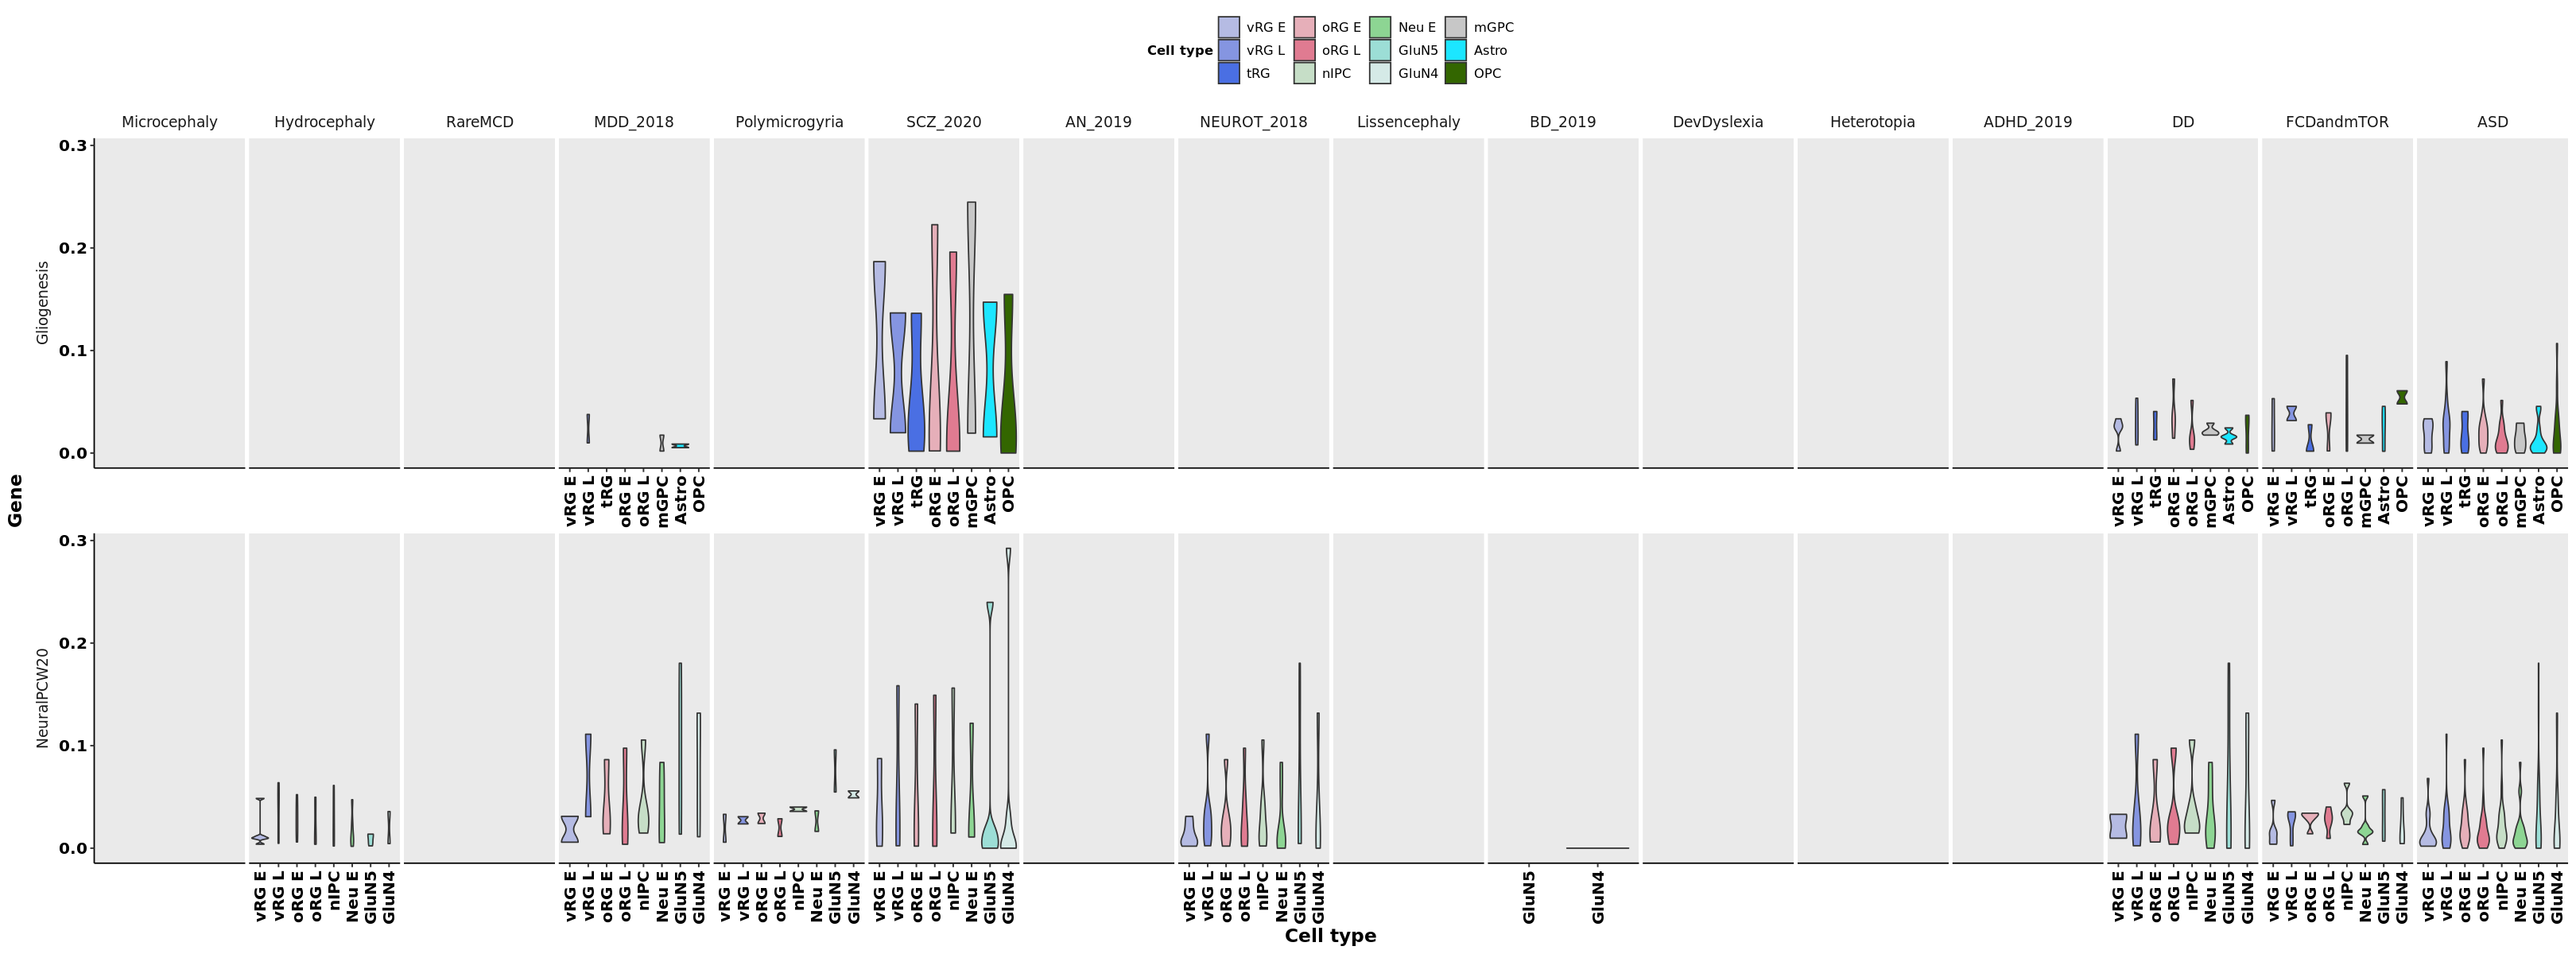

In [21]:
fig(27,10)
p <- ggplot(network.dis.df, 
            aes(x=cell.type.label, 
                y=degree_centrality_out,
                # color=Value
                fill=cell.type.label
               )) +
    facet_grid2(cols=vars(Disease), rows=vars(Sample), scales='free_x', independent = 'x', switch='y') +

    # geom_point(
    #     alpha=0.8,
    #     position=position_jitter(height=0)
    # ) + 

    geom_violin(
    ) + 
    scale_fill_manual('Cell type', values = CellTypeColor) +
  # scale_fill_viridis_c(name=ScoreLabels[score], 'rocket', direction = -1) + 

  ylab('Gene') +
  xlab('Cell type') +
  # ggtitle(SampleLabels[sample], subtitle=paste(sample, ScoreLabels[score])) +

  theme_pubr(legend = 'top') +
  labs_pubr(base_family = 'ArialMT') +
  # guides(fill = guide_colorbar(barwidtht = 1)) +

  theme(panel.background  = element_rect(fill='#eaeaea'),
    panel.spacing = unit(0.2, "lines"),
    strip.background = element_blank(),
    strip.placement = 'outside',
    # panel.background = element_blank(),
    axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5),
    axis.text.y = element_text(),
    # legend.box="vertical",
    # legend.text = element_text(angle=90, hjust=1, vjust=0.5)
  )
p


## Manhattan Per Cell Type

In [20]:
library(ggrepel)

In [21]:
fname <- 'ScoreComparison.PerDisease.pdf'
pdf(fname, width=20, height=9, useDingbats = F)

for (score in ScoreInclude){
    message(score)
    network.dis.df$score.plot <- network.dis.df[,score, drop=T]
    
    
    p <- ggplot(network.dis.df, 
                aes(#x=0,
                    x=cell.type.label,
                    y=score.plot,
                    # color=Value
                    color=cell.type.label
                   )) +
        facet_grid2(cols=vars(Disease), rows=vars(SampleLabel), scales='free_x', independent = 'x', switch='y') +

        geom_point(
            aes(shape=is.core),
            size=2, stroke=1,
            fill='transparent',
            alpha=0.8,
            # position=pos_jit_width
        ) + 
        scale_shape_manual('Regulon core TF', values=c('TRUE'=19, 'FALSE'=21), labels=c('TRUE'='Yes', 'FALSE'='No')) +
        scale_color_manual('Cell type', values = CellTypeColor) +

      ylab(ScoreLabels[score]) +
      xlab('Cell type') +
      # ggtitle(SampleLabels[sample], subtitle=paste(sample, ScoreLabels[score])) +

      theme_pubr(legend = 'bottom') +
      labs_pubr(base_family = 'ArialMT') +
      # guides(fill = guide_colorbar(barwidtht = 1)) +

      theme(
          text = element_text(family='ArialMT'),
        panel.border = element_rect(colour = "darkgrey", fill=NA, 
                                    # linewidth=0.8,
                                    size=0.8
                                   ),
        panel.grid.major.y = element_line(color='grey', 
                                          # linewidth=0.5
                                          size=0.5
                                         ),
        panel.grid.minor.y = element_line(color='grey', 
                                          # linewidth=0.5
                                          size=0.5
                                         ),
        panel.spacing = unit(0.2, "lines"),
        strip.background = element_blank(),
        strip.placement = 'outside',
        panel.background  = element_rect(fill='white'),
        # axis.text.x = element_blank(),
        # axis.ticks.x = element_blank(),
        axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5),
        axis.text.y = element_text(),

        # legend.box="vertical",
        # legend.text = element_text(angle=90, hjust=1, vjust=0.5)
      )



    to_annot <- network.dis.df %>% group_by(Disease, Sample) %>% 
        slice_max(order_by = score.plot, n = 5, with_ties = FALSE)
    nrow(to_annot)

    p <- p + geom_text_repel(data = to_annot,
                             mapping = aes(label=Gene), 
                         size=3, color='black',
                         # position = pos_jit_width, 
                         min.segment.length = 0)


    plot(p)
} 
dev.off()

degree_all

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
degree_centrality_all

degree_in

degree_centrality_in

degree_out

degree_centrality_out

betweenness_centrality

eigenvector_centrality

connectivity

participation



png 
  2

## Manhattan Per Gene

In [22]:
order_df <- function(df, grouped, label.genes = 5, only.top.n = 25){

    
    gene.maxs <- df %>% 
        group_by(Gene) %>% 
        summarise(max.score = max(score.plot), 
                  which.max.score=as.character(cell.type)[which.max(score.plot)[1]]) %>% ungroup() %>%
        arrange(desc(max.score)) %>% mutate(gene.order = order(max.score, decreasing = T, na.last = T))
    
    gene.maxs$is.top.gene <- gene.maxs$gene.order <= label.genes
    
    
    df <- merge(df, gene.maxs, by='Gene', all=T)
    df$label <- ifelse(
        (
            (as.character(df$cell.type) == df$which.max.score) &
            (df$is.top.gene)
        ),
        df$Gene, NA)
    
    
    top.genes <- unique(df$Gene[df$gene.order <= only.top.n])
    
    
    # print(df[duplicated(df$label) &  !is.na(df$label),])
        
    df <- subset(df, Gene %in% top.genes)
    return(df)
}

In [23]:
fname <- 'ScoreComparison.PerDisease.GeneView.pdf'
pdf(fname, width=20, height=9, useDingbats = F)

for (score in ScoreInclude){
    message(score)
    
    score.df <- network.dis.df[network.dis.df[score]!=0,]
    score.df$score.plot <- score.df[,score, drop=T]
    
    
    score.df <- score.df %>%group_by(Disease, SampleLabel) %>% group_modify(.f = order_df, .keep=F) %>% ungroup()  
    
    p <- ggplot(score.df, 
                aes(#x=0,
                    # x=cell.type.label,
                    x=score.plot,
                    y=gene.order,
                    # color=Value
                    color=cell.type.label
                   ))  + 
        facet_grid2(cols=vars(Disease), rows=vars(SampleLabel), scales='free', independent = 'y', switch='y') +

        geom_point(
            aes(shape=is.core),
            size=2, stroke=1,
            fill='transparent',
            alpha=0.8,
            # position=pos_jit_width
        ) +
        scale_shape_manual('Regulon core TF', values=c('TRUE'=19, 'FALSE'=21), labels=c('TRUE'='Yes', 'FALSE'='No')) +
        scale_color_manual('Cell type', values = CellTypeColor) + 

      xlab(ScoreLabels[score]) +
      ylab('Gene') +
      # ggtitle(SampleLabels[sample], subtitle=paste(sample, ScoreLabels[score])) +

      theme_pubr(legend = 'top') +
      labs_pubr(base_family = 'ArialMT') +

      scale_x_reverse(expand = expansion(mult = c(1.5,NA))) + scale_y_reverse() +
      theme(
        text = element_text(family='ArialMT'),
        panel.border = element_rect(colour = "darkgrey", fill=NA, size=0.8),
        panel.grid.major.x = element_line(color='grey', size=0.5),
        panel.grid.minor.x = element_line(color='grey', size=0.2),
        panel.spacing = unit(0.2, "lines"),
        strip.background = element_blank(),
        strip.placement = 'outside',
        panel.background  = element_rect(fill='white'),
        # axis.text.x = element_blank(),
        # axis.ticks.x = element_blank(),
        axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5),
        axis.text.y = element_blank(),

        # legend.box="vertical",
        # legend.text = element_text(angle=90, hjust=1, vjust=0.5)
      )
    
    
    p <- p + geom_text_repel(mapping = aes(label=label), 
                             max.time=10, max.iter=1E4,
                             size=3, color='black',
                             max.overlaps=10, 
                             box.padding= 0.1,
                             force = 0.1,
                             # nudge_y           = -1,
                             nudge_x           = -200,
                             direction         = "both",
                             # hjust             = 1,
                             segment.size=.5,
                             min.segment.length      = 0,
                             # segment.curvature = 0.6
                            )
    plot(p)
    # stop()
    # break
}
dev.off()

degree_all

Warning message:
“Removed 611 rows containing missing values (`geom_text_repel()`).”
degree_centrality_all

Warning message:
“Removed 611 rows containing missing values (`geom_text_repel()`).”
degree_in

Warning message:
“Removed 146 rows containing missing values (`geom_text_repel()`).”
degree_centrality_in

Warning message:
“Removed 146 rows containing missing values (`geom_text_repel()`).”
degree_out

Warning message:
“Removed 579 rows containing missing values (`geom_text_repel()`).”
degree_centrality_out

Warning message:
“Removed 579 rows containing missing values (`geom_text_repel()`).”
betweenness_centrality

Warning message:
“Removed 113 rows containing missing values (`geom_text_repel()`).”
eigenvector_centrality

Warning message:
“Removed 610 rows containing missing values (`geom_text_repel()`).”
connectivity

Warning message:
“Removed 611 rows containing missing values (`geom_text_repel()`).”
participation

Warning message:
“Removed 507 rows containing missing v

png 
  2

## Unified cell types

In [31]:
network.dis.uni <- subset(network.dis.df, Sample %in% SampleInclude)
not.neu <- unique(subset(network.dis.uni, SampleLabel == 'Gliogenesis')$cell.type)
network.dis.uni <- subset(network.dis.uni, !(SampleLabel == 'Neurogenesis' & cell.type %in% not.neu))    

In [32]:
CellTypeColor <- setNames(
    c(
        '#bec1d4','#7d87b9','#023fa5','#d6bcc0','#bb7784','#8e063b','#b5bbe3',
        '#8595e1','#4a6fe3','#e6afb9','#e07b91','#d33f6a','#11c638','#8dd593',
        '#c6dec7','#ead3c6','#f0b98d','#ef9708','#0fcfc0','#9cded6','#d5eae7',
        '#f3e1eb','#f6c4e1','#f79cd4','#7f7f7f','#c7c7c7','#1CE6FF','#336600'
    )[1:length(CellTypeOrder)],
    CellTypeOrder)


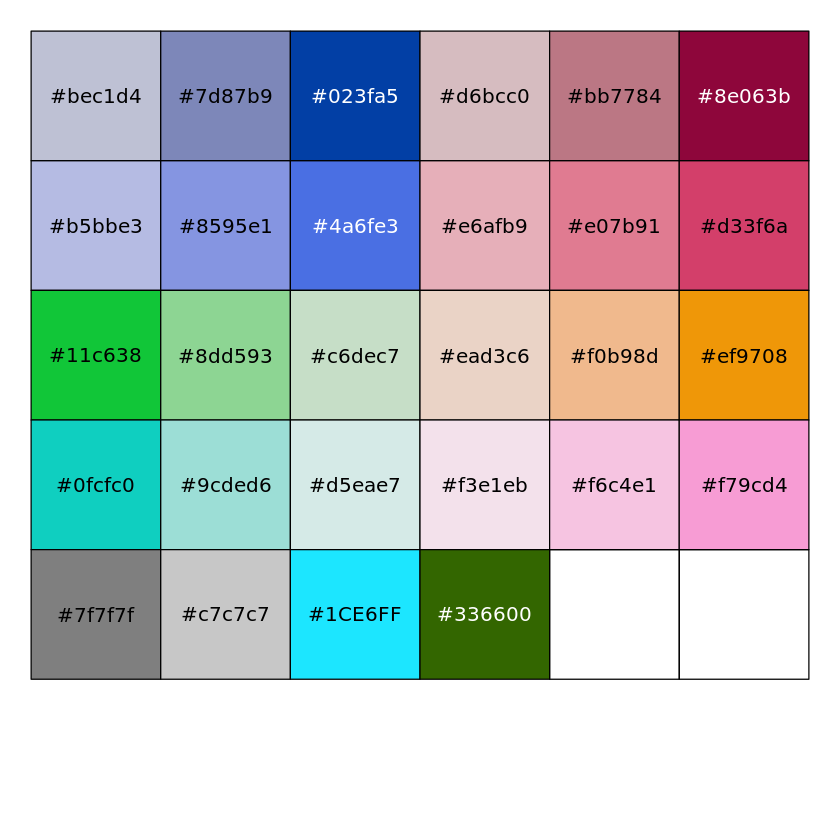

In [33]:
scales::show_col(CellTypeColor)

In [42]:
fname <- 'ScoreComparison.Unified.PerDisease.pdf'
pdf(fname, width=20, height=9, useDingbats = F)

for (score in ScoreInclude){
    message(score)
    
    network.dis.uni$score.plot <- network.dis.uni[,score, drop=T]


    p <- ggplot(network.dis.uni, 
                aes(#x=0,
                    x=cell.type.label,
                    y=score.plot,
                    # color=Value
                    color=cell.type.label
                   )) +
        facet_wrap2(vars(Disease), scales='free_x',ncol=if (tf_only) 8 else 9) +
        # facet_grid(cols = vars(Disease), scales = "free_x", space = "free_x") +#, ncol=if (tf_only) 8 else 9) +
        geom_point(
            aes(shape=is.core),
            size=3, stroke=1.5,
            fill='transparent',
            alpha=0.8,
            position=pos_jit_width
        ) + 
        scale_shape_manual('Regulon core TF', values=c('TRUE'=19, 'FALSE'=21), labels=c('TRUE'='Yes', 'FALSE'='No')) +
        scale_color_manual('Cell type', values = CellTypeColor) +

      ylab(ScoreLabels[score]) +
      xlab('Cell type') +
      # ggtitle(SampleLabels[sample], subtitle=paste(sample, ScoreLabels[score])) +

      theme_pubr(legend = 'bottom') +
      labs_pubr(base_family = 'ArialMT') +
      # guides(fill = guide_colorbar(barwidtht = 1)) +

      theme(
          text = element_text(family='ArialMT'),
        panel.border = element_rect(colour = "darkgrey", fill=NA, 
                                    # linewidth=0.8,
                                    size=0.8
                                   ),
        panel.grid.major.y = element_line(color='grey', 
                                          # linewidth=0.5
                                          size=0.5
                                         ),
        panel.grid.minor.y = element_line(color='grey', 
                                          # linewidth=0.5
                                          size=0.5
                                         ),
        panel.spacing = unit(0.2, "lines"),
        strip.background = element_blank(),
        strip.placement = 'outside',
        panel.background  = element_rect(fill='white'),
        # axis.text.x = element_blank(),
        # axis.ticks.x = element_blank(),
        axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5),
        axis.text.y = element_text(),

        # legend.box="vertical",
        # legend.text = element_text(angle=90, hjust=1, vjust=0.5)
      )



    to_annot <- network.dis.uni %>% group_by(Disease) %>% 
        slice_max(order_by = score.plot, n = 10, with_ties = FALSE)
    nrow(to_annot)

    p <- p + geom_text_repel(
        data=to_annot,
        force_pull   = 0, # do not pull toward data points
        # nudge_y      = max(to_annot$score.plot)/8,
        direction    = "y",
        # angle        = 90,
        hjust        = 0,
        # segment.size = 0.2,
        # max.iter = 1e4, max.time = 1,
        mapping = aes(label=Gene),
        size=4, color='black',
        position = pos_jit_width,
        min.segment.length = 0)


    plot(p)
} 
dev.off()

degree_all

degree_centrality_all

degree_in

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
degree_centrality_in

Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
degree_out

degree_centrality_out

betweenness_centrality

eigenvector_centrality

connectivity

participation

Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


png 
  2

In [29]:
pos_jit_width <- position_jitter(width = 0.1, height=0, seed = 1)

### Top Diseases

In [29]:
fname <- 'ScoreComparison.Unified.PerDisease.Top.pdf'
pdf(fname, width=21, height=6, useDingbats = F)

for (score in ScoreInclude){
    message(score)
    
    network.dis.uni$score.plot <- network.dis.uni[,score, drop=T]
    
    top.ten.disease <- as.character((network.dis.uni %>% group_by(Disease)%>% summarize(max=max(score.plot)) %>% arrange(desc(max)) %>% head(n=12))$Disease)
    
    p <- ggplot(subset(network.dis.uni, Disease %in% top.ten.disease), 
                aes(#x=0,
                    x=cell.type.label,
                    y=score.plot,
                    # color=Value
                    color=cell.type.label
                   )) +
        facet_wrap(vars(Disease), scales='free_x', ncol = 6) +

        geom_point(
            aes(shape=is.core),
            size=4, stroke=2,
            fill='white',
            alpha=0.9,
            position=pos_jit_width
        ) + 
        scale_shape_manual('Regulon core TF', values=c('TRUE'=19, 'FALSE'=21), labels=c('TRUE'='Yes', 'FALSE'='No')) +
        scale_color_manual('Cell type', values = CellTypeColor) +

      ylab(ScoreLabels[score]) +
      xlab('Cell type') +
      # ggtitle(SampleLabels[sample], subtitle=paste(sample, ScoreLabels[score])) +

      theme_pubr(legend = 'right') +
      labs_pubr(base_family = 'ArialMT') +
      # guides(fill = guide_colorbar(barwidtht = 1)) +

      theme(
          text = element_text(family='ArialMT'),
        panel.border = element_rect(colour = "darkgrey", fill=NA, 
                                    # linewidth=0.8,
                                    size=0.8
                                   ),
        panel.grid.major.y = element_line(color='grey', 
                                          # linewidth=0.5
                                          size=0.5
                                         ),
        panel.grid.minor.y = element_line(color='grey', 
                                          # linewidth=0.5
                                          size=0.5
                                         ),
        panel.spacing = unit(0.2, "lines"),
        strip.background = element_blank(),
        strip.placement = 'outside',
        panel.background  = element_rect(fill='white'),
        # axis.text.x = element_blank(),
        # axis.ticks.x = element_blank(),
        axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5),
        axis.text.y = element_text(),

        # legend.box="vertical",
        # legend.text = element_text(angle=90, hjust=1, vjust=0.5)
      )



    to_annot <- subset(network.dis.uni, Disease %in% top.ten.disease) %>% 
        group_by(Disease) %>% 
        slice_max(order_by = score.plot, n = 12, with_ties = FALSE)
    nrow(to_annot)

    p <- p + geom_text_repel(
        data=to_annot,
        force_pull   = 0, # do not pull toward data points
        # nudge_y      = max(to_annot$score.plot)/8,
        direction    = "y",
        # angle        = 90,
        hjust        = 0,
        # segment.size = 0.2,
        # max.iter = 1e4, max.time = 1,
        mapping = aes(label=Gene),
        size=4, color='black',
        position = pos_jit_width,
        min.segment.length = 0)

    # stop()

    plot(p)
    # break()
} 
dev.off()

degree_all

degree_centrality_all

degree_in

Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
degree_centrality_in

Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
degree_out

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
degree_centrality_out

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
betweenness_centrality

Warning message:
“ggrepel

png 
  2

Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


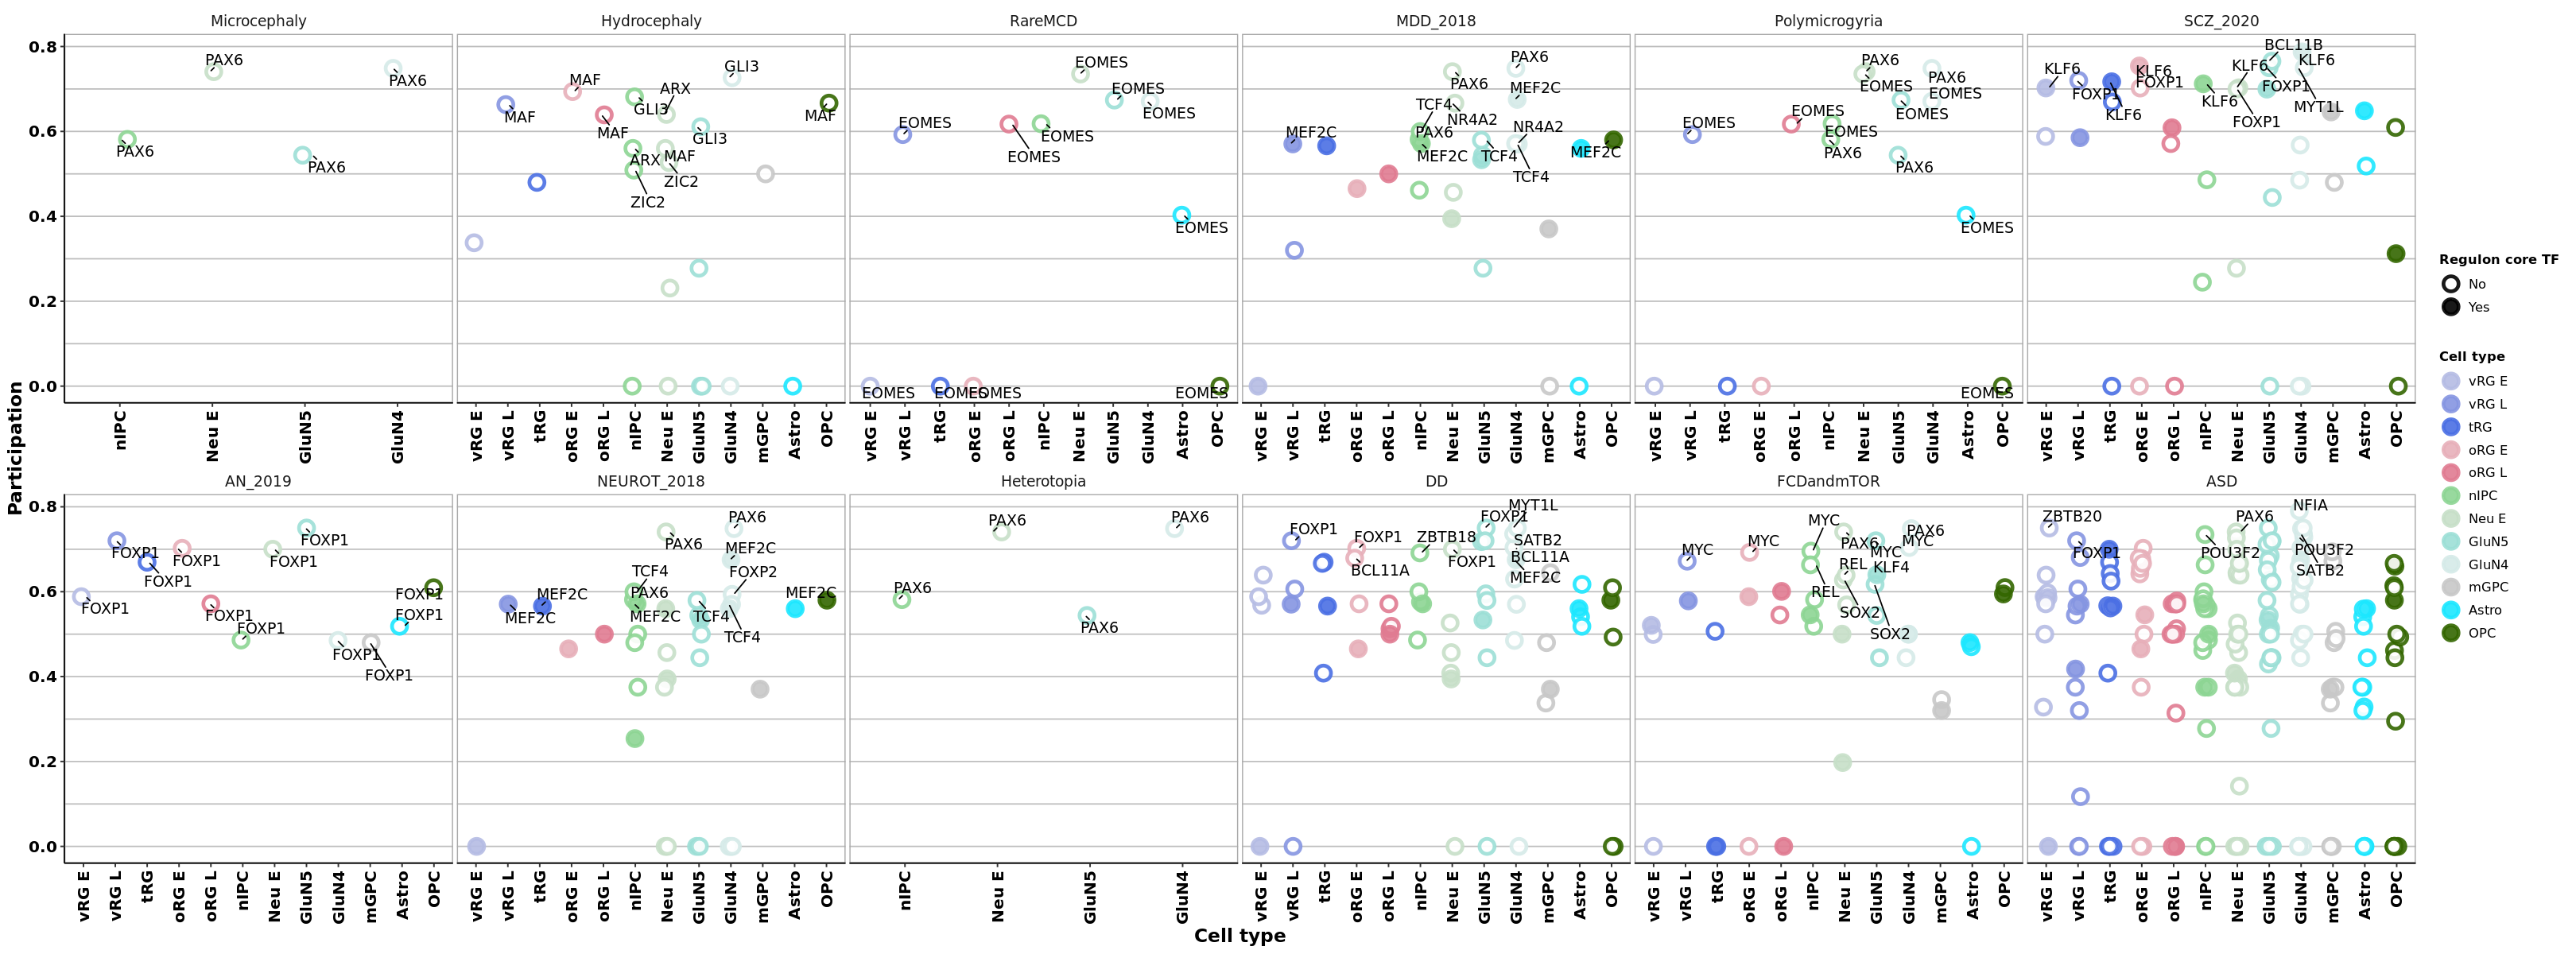

In [30]:
p

# Scatter pie test

# DotPlot with genes from neurogenesis for RGCs when Glio-scores are not available

In [5]:
library(scatterpie)

In [6]:
dp.df <- subset(NetworkScores, Sample %in% SampleInclude & Gene %in% disease_genes)

# Select only gliogenesis when neuro and glio are available
dp.df <- dp.df %>% arrange(Gene, cell.type, Sample) %>% group_by(Gene, cell.type) %>% slice_head(n=1)

# Get list of available genes
dp.genes <- as.character(unique(dp.df$Gene))
# Get list of available genes
dp.cts <- as.character(unique(sort(dp.df$cell.type)))

dp.axes.colors <- setNames(
    c('deepskyblue3', 'darkgoldenrod', 'darkolivegreen'),
    c('Neurogenesis', 'Gliogenesis', 'Neurogenesis Gliogenesis'))

# Create table of genes per sample for the plot
dp.genes.per.sample <- data.frame(
    lapply(
        lapply(
            split(dp.df$Gene, dp.df$Sample),
            unique), 
        function(x){ dp.genes%in%x }), 
    row.names=dp.genes) %>%
    
    mutate(In=paste0(
        ifelse(NeuralPCW20, 'Neurogenesis', ''),
        ifelse(NeuralPCW20 & Gliogenesis, ' ', ''),
        ifelse(Gliogenesis, 'Gliogenesis', ''))) %>% 

    mutate(Color=dp.axes.colors[In])

# Create table of cell.types per sample for the plot
dp.cts.per.sample <- data.frame(
    lapply(
        lapply(
            split(dp.df$cell.type, dp.df$Sample), 
            unique), 
        function(x){
               dp.cts%in%x
           }), 
    row.names=dp.cts) %>% 
    
    mutate(In=paste0(
        ifelse(NeuralPCW20, 'Neurogenesis', ''),
        ifelse(NeuralPCW20 & Gliogenesis, ' ', ''),
        ifelse(Gliogenesis, 'Gliogenesis', ''))) %>% 

    mutate(Color=dp.axes.colors[In])

# Gather diseases
dp.diseases <- Diseases[dp.genes,] %>% mutate_all(function(x){if (sum(x)==0) NULL else x}) %>% mutate(Gene=dp.genes)
# Append diseases
dp.df <- merge(dp.df, dp.diseases, all=T, by='Gene')

In [7]:
library(scatterpie)
pdf('Dotplots.RGC_combined_genes.pdf', height=9, width=18, useDingbats = F)

## For each score
for (score in ScoreInclude){
    message(score)
    # score <- 'eigenvector_centrality'

    # Cluster scores
    score_mat <- reshape2::dcast(dp.df, formula = 'Gene ~ cell.type', value.var=score)
    score_mat[is.na(score_mat)] <- 0

    # Scale scores to see patterns in cell type trends
    score_mat[,-1] <- apply(score_mat[,-1], 2, function(x) x/max(x))
    # rowSums(score_mat[,-1])>0

    # hclust score
    dp.hc <- hclust(dist(score_mat[,-1]),method = 'ward.D2')
    dp.genes <- score_mat$Gene[dp.hc$order]

    # Get annotation of diseases
    dp.dis.df <- get.conf.dis.df(dp.genes)

    # Find and remove no risk diseases
    dis.valid <- dp.dis.df %>% group_by(Disease) %>% summarise(valid=sum(Risk) >0)
    dis.valid <- as.character(dis.valid$Disease[dis.valid$valid])
    dp.dis.colors <- DiseaseColor[dis.valid]                                                              

    dp.dis.df <- subset(dp.dis.df, Disease %in% dis.valid)
    dp.dis.df$Gene <- factor(dp.dis.df$Gene, levels = dp.genes)

                            
                            
    ## Create 3 plots: confusion and pies for diseases, dotplot for score
                            
    # 1 Plot disease confusion
    dp.dis.conf <- ggplot(dp.dis.df,
                          aes(y = factor(as.character(Disease), rev(levels(Disease))), 
                              x = Gene, 
                              fill = factor(Value, names(dis.conf.cols)))) +
        geom_tile(color = "grey", linewidth = 0.1) + 
        scale_fill_manual("Disease association", values = dis.conf.cols) + 
        theme_pubr(legend = "right") + 
        labs_pubr(base_family = "ArialMT") + 
        ylab('Disease') +
        theme(panel.spacing = unit(0.2, "lines"), 
              strip.background = element_blank(),
              panel.background = element_blank(), 
              axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1), 
              axis.text.y = element_text())

    # 2 Plot pies
    pies.plot <- ggplot() + 
        geom_scatterpie(
            data=dp.diseases %>% mutate(x=as.numeric(factor(Gene, dp.genes))), 
            pie_scale=.5,
            aes(x=x,
                y=1),
            cols=dis.valid
        ) + coord_fixed() +
        scale_fill_manual(values=dp.dis.colors) +
        scale_x_continuous(breaks=c(1:length(dp.genes)), 
                           labels=dp.genes,
                           limits = c(0, length(dp.genes)+1),
                           expand = expansion(mult = c(0, 0))
                          ) + 

        labs(x='Gene', y='Diseases') +

        theme_pubr(legend = 'top') +
        labs_pubr(base_family = 'ArialMT') +

          theme(
              axis.line.x = element_blank(),
              axis.line.y = element_blank(),
              text = element_text(family='ArialMT'),

              panel.border = element_blank(),
              panel.grid.major.x = element_blank(),
              panel.grid.major.y = element_blank(),
              axis.text.x = element_text(angle = 45, hjust=1, vjust=1),
              axis.text.y = element_blank(),
              axis.ticks.x = element_blank(),
              axis.ticks.y = element_blank(),
          ) 


    # 3 Dotplot
    dp.df$dp.score <- ifelse(dp.df[,score] >= 0, dp.df[,score], 0)
                            
    score.label <- ScoreLabels[score]
    if (max(dp.df$dp.score, na.rm=T)-min(dp.df$dp.score, na.rm=T) >= 1000){
        print('Log1p transforming')
        dp.df$dp.score <- log10(dp.df$dp.score+1)
        score.label <- paste0('log10(', score.label, ')')
    }
                            
    dot.plot <- ggplot(dp.df) + 

        geom_point(aes(x=factor(Gene, dp.genes), 
                       y=factor(as.character(cell.type),
                                rev(levels(cell.type))),
                       fill=dp.score, # either fill
                       size=dp.score # or size
                      ),
                   color='black', 
                   shape=21) +
                            
        scale_size_area(name=score.label, max_size = 10, n.breaks = 10) +
        scale_fill_viridis_c(name=score.label, option='magma') +

        labs(x='Gene', y='Cell type') +

        theme_pubr(legend = 'right') +
        labs_pubr(base_family = 'ArialMT') +

        theme(
            text = element_text(family='ArialMT'),
            panel.border = element_rect(colour = "darkgrey", fill=NA),
            panel.grid.major.x = element_line(color='grey', 
                                              size=0.5),
            panel.grid.major.y = element_line(color='grey', 
                                              size=0.5),
            axis.text.x = element_text(angle = 45, hjust=1, vjust=1),
        )
    
    # Color axes
    # suppressWarnings(expr = {  
        
        dot.plot <- dot.plot + theme(
            axis.text.x = element_text(color=as.character(dp.genes.per.sample[dp.genes,]$Color)),
            axis.text.y = element_text(color=as.character(dp.cts.per.sample[rev(dp.cts),]$Color)),
        )
    # })

    
    # Create combined version
    dp.conf.comb <- cowplot::plot_grid(
        dp.dis.conf + theme(axis.text.x=element_blank(),
                            axis.title.x = element_blank()), 
        NULL, dot.plot + scale_size_area(name=score.label, max_size = 9, n.breaks = 10), 
        
        rel_heights = c(.4,-.09,.5),
        ncol = 1, align='vh', axis = 'lrtb')
                           
                            
    # Create combined version
    dp.pies.comb <- cowplot::plot_grid(
        pies.plot + theme(axis.text.x=element_blank(),
                          axis.title.x = element_blank(),
                          axis.title.y = element_blank()),
        NULL, dot.plot, 
        
        rel_heights = c(.4,-.12,1),
        ncol = 1, align='vh', axis = 'lrtb')
                            
    plot(dp.conf.comb)
    plot(dp.pies.comb)

}
dev.off()
    

degree_all

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Warning message:
“Using the `size` aesthetic in this geom was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` in the `default_aes` field and elsewhere instead.”
degree_centrality_all

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially suppo

[1] "Log1p transforming"


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
eigenvector_centrality

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
connectivity

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may c

png 
  2

In [8]:
pdf('Dotplots.RGC_combined_genes.onlyFill.pdf', height=9, width=18, useDingbats = F)

## For each score
for (score in ScoreInclude){
    message(score)
    # score <- 'eigenvector_centrality'

    # Cluster scores
    score_mat <- reshape2::dcast(dp.df, formula = 'Gene ~ cell.type', value.var=score)
    score_mat[is.na(score_mat)] <- 0

    # Scale scores to see patterns in cell type trends
    score_mat[,-1] <- apply(score_mat[,-1], 2, function(x) x/max(x))
    # rowSums(score_mat[,-1])>0

    # hclust score
    dp.hc <- hclust(dist(score_mat[,-1]),method = 'ward.D2')
    dp.genes <- score_mat$Gene[dp.hc$order]

    # Get annotation of diseases
    dp.dis.df <- get.conf.dis.df(dp.genes)

    # Find and remove no risk diseases
    dis.valid <- dp.dis.df %>% group_by(Disease) %>% summarise(valid=sum(Risk) >0)
    dis.valid <- as.character(dis.valid$Disease[dis.valid$valid])
    dp.dis.colors <- DiseaseColor[dis.valid]                                                              

    dp.dis.df <- subset(dp.dis.df, Disease %in% dis.valid)
    dp.dis.df$Gene <- factor(dp.dis.df$Gene, levels = dp.genes)

                            
                            
    ## Create 3 plots: confusion and pies for diseases, dotplot for score
                            
    # 1 Plot disease confusion
    dp.dis.conf <- ggplot(dp.dis.df,
                          aes(y = factor(as.character(Disease), rev(levels(Disease))), 
                              x = Gene, 
                              fill = factor(Value, names(dis.conf.cols)))) +
        geom_tile(color = "grey", linewidth = 0.1) + 
        scale_fill_manual("Disease association", values = dis.conf.cols) + 
        theme_pubr(legend = "right") + 
        labs_pubr(base_family = "ArialMT") + 
        ylab('Disease') +
        theme(panel.spacing = unit(0.2, "lines"), 
              strip.background = element_blank(),
              panel.background = element_blank(), 
              axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1), 
              axis.text.y = element_text())

    # 2 Plot pies
    pies.plot <- ggplot() + 
        geom_scatterpie(
            data=dp.diseases %>% mutate(x=as.numeric(factor(Gene, dp.genes))), 
            pie_scale=.5,
            aes(x=x,
                y=1),
            cols=dis.valid
        ) + coord_fixed() +
        scale_fill_manual(values=dp.dis.colors) +
        scale_x_continuous(breaks=c(1:length(dp.genes)), 
                           labels=dp.genes,
                           limits = c(0, length(dp.genes)+1),
                           expand = expansion(mult = c(0, 0))
                          ) + 

        labs(x='Gene', y='Diseases') +

        theme_pubr(legend = 'top') +
        labs_pubr(base_family = 'ArialMT') +

          theme(
              axis.line.x = element_blank(),
              axis.line.y = element_blank(),
              text = element_text(family='ArialMT'),

              panel.border = element_blank(),
              panel.grid.major.x = element_blank(),
              panel.grid.major.y = element_blank(),
              axis.text.x = element_text(angle = 45, hjust=1, vjust=1),
              axis.text.y = element_blank(),
              axis.ticks.x = element_blank(),
              axis.ticks.y = element_blank(),
          ) 


    # 3 Dotplot
    dp.df$dp.score <- ifelse(dp.df[,score] >= 0, dp.df[,score], 0)
                            
    score.label <- ScoreLabels[score]
    if (max(dp.df$dp.score, na.rm=T)-min(dp.df$dp.score, na.rm=T) >= 1000){
        print('Log1p transforming')
        dp.df$dp.score <- log10(dp.df$dp.score+1)
        score.label <- paste0('log10(', score.label, ')')
    }
                            
    dot.plot <- ggplot(dp.df) + 

        geom_point(aes(x=factor(Gene, dp.genes), 
                       y=factor(as.character(cell.type),
                                rev(levels(cell.type))),
                       fill=dp.score
                       # size=dp.score # or size
                      ),
                   size=8,
                   color='black', 
                   shape=21) +
                            
        # scale_size_area(name=score.label, max_size = 10, n.breaks = 10) +
        scale_fill_viridis_c(name=score.label, option='magma') +

        labs(x='Gene', y='Cell type') +

        theme_pubr(legend = 'right') +
        labs_pubr(base_family = 'ArialMT') +

        theme(
            text = element_text(family='ArialMT'),
            panel.border = element_rect(colour = "darkgrey", fill=NA),
            panel.grid.major.x = element_line(color='grey', 
                                              size=0.5),
            panel.grid.major.y = element_line(color='grey', 
                                              size=0.5),
            axis.text.x = element_text(angle = 45, hjust=1, vjust=1),
        )
    
    # Color axes
    # suppressWarnings(expr = {  
        
        dot.plot <- dot.plot + theme(
            axis.text.x = element_text(color=as.character(dp.genes.per.sample[dp.genes,]$Color)),
            axis.text.y = element_text(color=as.character(dp.cts.per.sample[rev(dp.cts),]$Color)),
        )
    # })

    
    # Create combined version
    dp.conf.comb <- cowplot::plot_grid(
        dp.dis.conf + theme(axis.text.x=element_blank(),
                            axis.title.x = element_blank()), 
        NULL, dot.plot,# + scale_size_area(name=score.label, max_size = 9, n.breaks = 10), 
        
        rel_heights = c(.4,-.09,.5),
        ncol = 1, align='vh', axis = 'lrtb')
                           
                            
    # Create combined version
    dp.pies.comb <- cowplot::plot_grid(
        pies.plot + theme(axis.text.x=element_blank(),
                          axis.title.x = element_blank(),
                          axis.title.y = element_blank()),
        NULL, dot.plot, 
        
        rel_heights = c(.4,-.12,1),
        ncol = 1, align='vh', axis = 'lrtb')
                            
    plot(dp.conf.comb)
    plot(dp.pies.comb)
    # break()
                            

}
dev.off()
    

degree_all

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
degree_centrality_all

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
degree_in

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
degree

[1] "Log1p transforming"


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
eigenvector_centrality

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
connectivity

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
participation


png 
  2

# DotPlot with genes from only Gliogenesis for RGCs

In [33]:
dp.df <- subset(NetworkScores, Sample %in% SampleInclude & Gene %in% disease_genes)

# Find cts in gliogenesis and remove neurogenesis equivalents
dp.cts.not.neu <- unique(subset(dp.df, SampleLabel == 'Gliogenesis')$cell.type)
dp.df <- subset(dp.df, !(SampleLabel == 'Neurogenesis' & cell.type %in% dp.cts.not.neu))

# Get list of available genes
dp.genes <- as.character(unique(dp.df$Gene))
# Get list of available genes
dp.cts <- as.character(unique(sort(dp.df$cell.type)))


dp.axes.colors <- setNames(
    c('deepskyblue3', 'darkgoldenrod', 'darkolivegreen'),
    c('Neurogenesis', 'Gliogenesis', 'Neurogenesis Gliogenesis'))


# Create table of genes per sample for the plot
dp.genes.per.sample <- data.frame(
    lapply(
        lapply(
            split(dp.df$Gene, dp.df$Sample),
            unique), 
        function(x){ dp.genes%in%x }), 
    row.names=dp.genes) %>%

    mutate(In=paste0(
        ifelse(NeuralPCW20, 'Neurogenesis', ''),
        ifelse(NeuralPCW20 & Gliogenesis, ' ', ''),
        ifelse(Gliogenesis, 'Gliogenesis', ''))) %>% 

    mutate(Color=dp.axes.colors[In])

# Create table of cell.types per sample for the plot
dp.cts.per.sample <- data.frame(
    lapply(
        lapply(
            split(dp.df$cell.type, dp.df$Sample), 
            unique), 
        function(x){
               dp.cts%in%x
           }), 
    row.names=dp.cts) %>% 
    
    mutate(In=paste0(
        ifelse(NeuralPCW20, 'Neurogenesis', ''),
        ifelse(NeuralPCW20 & Gliogenesis, ' ', ''),
        ifelse(Gliogenesis, 'Gliogenesis', ''))) %>% 

    mutate(Color=dp.axes.colors[In])


# Gather diseases
dp.diseases <- Diseases[dp.genes,] %>% mutate_all(function(x){if (sum(x)==0) NULL else x}) %>% mutate(Gene=dp.genes)
# Append diseases
dp.df <- merge(dp.df, dp.diseases, all=T, by='Gene')

In [34]:
pdf('Dotplots.RGC_gliog_genes.pdf', height=9, width=18, useDingbats = F)

## For each score
for (score in ScoreInclude){
    message(score)
    # score <- 'eigenvector_centrality'

    # Cluster scores
    score_mat <- reshape2::dcast(dp.df, formula = 'Gene ~ cell.type', value.var=score)
    score_mat[is.na(score_mat)] <- 0

    # Scale scores to see patterns in cell type trends
    score_mat[,-1] <- apply(score_mat[,-1], 2, function(x) x/max(x))
    # rowSums(score_mat[,-1])>0

    # hclust score
    dp.hc <- hclust(dist(score_mat[,-1]),method = 'ward.D2')
    dp.genes <- score_mat$Gene[dp.hc$order]

    # Get annotation of diseases
    dp.dis.df <- get.conf.dis.df(dp.genes)

    # Find and remove no risk diseases
    dis.valid <- dp.dis.df %>% group_by(Disease) %>% summarise(valid=sum(Risk) >0)
    dis.valid <- as.character(dis.valid$Disease[dis.valid$valid])
    dp.dis.colors <- DiseaseColor[dis.valid]                                                              

    dp.dis.df <- subset(dp.dis.df, Disease %in% dis.valid)
    dp.dis.df$Gene <- factor(dp.dis.df$Gene, levels = dp.genes)

                            
                            
    ## Create 3 plots: confusion and pies for diseases, dotplot for score
                            
    # 1 Plot disease confusion
    dp.dis.conf <- ggplot(dp.dis.df,
                          aes(y = factor(as.character(Disease), rev(levels(Disease))), 
                              x = Gene, 
                              fill = factor(Value, names(dis.conf.cols)))) +
        geom_tile(color = "grey", linewidth = 0.1) + 
        scale_fill_manual("Disease association", values = dis.conf.cols) + 
        theme_pubr(legend = "right") + 
        labs_pubr(base_family = "ArialMT") + 
        ylab('Disease') +
        theme(panel.spacing = unit(0.2, "lines"), 
              strip.background = element_blank(),
              panel.background = element_blank(), 
              axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1), 
              axis.text.y = element_text())

    # 2 Plot pies
    pies.plot <- ggplot() + 
        geom_scatterpie(
            data=dp.diseases %>% mutate(x=as.numeric(factor(Gene, dp.genes))), 
            pie_scale=.5,
            aes(x=x,
                y=1),
            cols=dis.valid
        ) + coord_fixed() +
        scale_fill_manual(values=dp.dis.colors) +
        scale_x_continuous(breaks=c(1:length(dp.genes)), 
                           labels=dp.genes,
                           limits = c(0, length(dp.genes)+1),
                           expand = expansion(mult = c(0, 0))
                          ) + 

        labs(x='Gene', y='Diseases') +

        theme_pubr(legend = 'top') +
        labs_pubr(base_family = 'ArialMT') +

          theme(
              axis.line.x = element_blank(),
              axis.line.y = element_blank(),
              text = element_text(family='ArialMT'),

              panel.border = element_blank(),
              panel.grid.major.x = element_blank(),
              panel.grid.major.y = element_blank(),
              axis.text.x = element_text(angle = 45, hjust=1, vjust=1),
              axis.text.y = element_blank(),
              axis.ticks.x = element_blank(),
              axis.ticks.y = element_blank(),
          ) 


    # 3 Dotplot
    dp.df$dp.score <- ifelse(dp.df[,score] >= 0, dp.df[,score], 0)
    score.label <- ScoreLabels[score]
    if (max(dp.df$dp.score, na.rm=T)-min(dp.df$dp.score, na.rm=T) >= 1000){
        print('Log1p transforming')
        dp.df$dp.score <- log10(dp.df$dp.score+1)
        score.label <- paste0('log10(', score.label, ')')
    }
                            
    dot.plot <- ggplot(dp.df) + 

        geom_point(aes(x=factor(Gene, dp.genes), 
                       y=factor(as.character(cell.type),
                                rev(levels(cell.type))),
                       fill=dp.score,
                       size=dp.score),
                   color='black', 
                   shape=21) +
                            
        scale_size_area(name=score.label, max_size = 10, n.breaks = 10) +
        scale_fill_viridis_c(name=score.label, option='cividis') +

        labs(x='Gene', y='Cell type') +

        theme_pubr(legend = 'right') +
        labs_pubr(base_family = 'ArialMT') +

        theme(
            text = element_text(family='ArialMT'),
            panel.border = element_rect(colour = "darkgrey", fill=NA),
            panel.grid.major.x = element_line(color='grey', 
                                              size=0.5),
            panel.grid.major.y = element_line(color='grey', 
                                              size=0.5),
            axis.text.x = element_text(angle = 45, hjust=1, vjust=1),
        )
    
    # Color axes
    suppressWarnings(expr = {  
        
        dot.plot <- dot.plot + theme(
            axis.text.x = element_text(color=as.character(dp.genes.per.sample[dp.genes,]$Color)),
            axis.text.y = element_text(color=as.character(dp.cts.per.sample[rev(dp.cts),]$Color)),
        )
    })

    
    # Create combined version
    dp.conf.comb <- cowplot::plot_grid(
        dp.dis.conf + theme(axis.text.x=element_blank(),
                            axis.title.x = element_blank()), 
        NULL, dot.plot + scale_size_area(name=score.label, max_size = 9, n.breaks = 10), 
        
        rel_heights = c(.4,-.09,.5),
        ncol = 1, align='vh', axis = 'lrtb')
                           
                            
    # Create combined version
    dp.pies.comb <- cowplot::plot_grid(
        pies.plot + theme(axis.text.x=element_blank(),
                          axis.title.x = element_blank(),
                          axis.title.y = element_blank()),
        NULL, dot.plot, 
        
        rel_heights = c(.4,-.12,1),
        ncol = 1, align='vh', axis = 'lrtb')
                            
    plot(dp.conf.comb)
    plot(dp.pies.comb)
}
dev.off()
    

degree_all

Warning message:
“Ignoring unknown parameters: linewidth”
Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

degree_centrality_all

Warning message:
“Ignoring unknown parameters: linewidth”
Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

degree_in

Warning message:
“Ignoring unknown parameters: linewidth”
Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

degree_centrality_in

Warning message:
“Ignoring unknown parameters: linewidth”
Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

degree_out

Warning message:
“Ignoring unknown parameters: linewidth”
Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

degree_centrality_out

Warning message:
“Ignoring unknown parameters: linewidth”

[1] "Log1p transforming"


Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

eigenvector_centrality

Warning message:
“Ignoring unknown parameters: linewidth”
Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

connectivity

Warning message:
“Ignoring unknown parameters: linewidth”
Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.

participation

Warning message:
“Ignoring unknown parameters: linewidth”
Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.



png 
  2

# Option 2: cell type comparison per peak

In [35]:
meta.colors$PeakSample

P2.FGF20  P2.FGF10   P2.FGF1 P2.FGF0.1  P3.FGF20  P3.FGF10   P3.FGF1 P3.FGF0.1 
"#006D2C" "#31A354" "#74C476" "#BAE4B3" "#08519C" "#3182BD" "#6BAED6" "#BDD7E7" 
 P4.FGF20  P4.FGF10   P4.FGF1 P4.FGF0.1  P6.FGF20  P6.FGF10   P6.FGF1 P6.FGF0.1 
"#A50F15" "#DE2D26" "#FB6A4A" "#FCAE91" "#54278F" "#756BB1" "#9E9AC8" "#CBC9E2" 
 P8.FGF20  P8.FGF10   P8.FGF1 P8.FGF0.1 
"#252525" "#636363" "#969696" "#CCCCCC"

In [36]:
get.expand.peak.df <- function(df){
    
    peak.genes <- subset(get.conf.peak.df(unique(df$Gene)), Value!='None')
    peak.list <- split(peak.genes[,c('Gene', 'Value')], peak.genes$Peak)

    peak.df <- do.call('rbind', 
                      lapply(
                          names(peak.list),
                          function(x){

                              dgenes <- unique(peak.list[[x]]$Gene)
                              ddf <- subset(df, Gene %in% dgenes)

                              ddf$Peak <- x
                              ddf$Value <- peak.list[[x]]$Value[match(x=ddf$Gene, peak.list[[x]]$Gene)]
                              ddf

                          })) %>% mutate(Peak=factor(Peak, names(peak.list)))
    return(peak.df)
}


In [37]:
network.peak.df <- get.expand.peak.df(subset(NetworkScores, Sample %in% SampleInclude))

In [38]:
# network.peak.df$cell.type.label <- factor(CellTypeLabels[as.character(network.peak.df$cell.type)], CellTypeOrder)
network.peak.df$cell.type.label <- factor(as.character(network.peak.df$cell.type), CellTypeOrder)

In [39]:
network.peak.df$is.core <- network.peak.df$Gene %in% regulon_cores

In [40]:
fname <- 'ScoreComparison.PerPeak.pdf'
pdf(fname, width=20, height=9, useDingbats = F)

for (score in ScoreInclude){
    message(score)
    network.peak.df$score.plot <- network.peak.df[,score, drop=T]
    
    
    p <- ggplot(network.peak.df, 
                aes(#x=0,
                    x=cell.type.label, 
                    y=score.plot,
                    # color=Value
                    color=cell.type
                   )) +
        facet_grid2(cols=vars(Peak), rows=vars(SampleLabel), scales='free_x', independent = 'x', switch='y') +

        geom_point(
            aes(shape=is.core),
            size=2, stroke=1,
            fill='transparent',
            alpha=0.8,
            # position=pos_jit_width
        ) + 
        scale_shape_manual('Regulon core TF', values=c('TRUE'=19, 'FALSE'=21), labels=c('TRUE'='Yes', 'FALSE'='No')) +
        scale_color_manual('Cell type', values = CellTypeColor) +

      ylab(ScoreLabels[score]) +
      xlab('Cell type') +
      # ggtitle(SampleLabels[sample], subtitle=paste(sample, ScoreLabels[score])) +

      theme_pubr(legend = 'bottom') +
      labs_pubr(base_family = 'ArialMT') +
      # guides(fill = guide_colorbar(barwidtht = 1)) +

      theme(
          text = element_text(family='ArialMT'),
        panel.border = element_rect(colour = "darkgrey", fill=NA, size=0.8),
        panel.grid.major.y = element_line(color='grey', size=0.5),
        panel.grid.minor.y = element_line(color='grey', size=0.2),
        panel.spacing = unit(0.2, "lines"),
        strip.background = element_blank(),
        strip.placement = 'outside',
        panel.background  = element_rect(fill='white'),
        # axis.text.x = element_blank(),
        # axis.ticks.x = element_blank(),
        axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5),
        axis.text.y = element_text(),

        # legend.box="vertical",
        # legend.text = element_text(angle=90, hjust=1, vjust=0.5)
      )



    to_annot <- network.peak.df %>% group_by(Peak, Sample) %>% 
        slice_max(order_by = score.plot, n = 5, with_ties = FALSE)
    nrow(to_annot)

    p <- p + geom_text_repel(data = to_annot,
                             mapping = aes(label=Gene), 
                         size=3, color='black',
                         # position = pos_jit_width, 
                         min.segment.length = 0)


    plot(p)
}  
dev.off()


degree_all

degree_centrality_all

degree_in

degree_centrality_in

degree_out

degree_centrality_out

betweenness_centrality

eigenvector_centrality

connectivity

participation



png 
  2

In [41]:
fname <- 'ScoreComparison.PerPeak.GeneView.pdf'
pdf(fname, width=20, height=9, useDingbats = F)

for (score in ScoreInclude){
    message(score)
    
    score.df <- network.peak.df[network.peak.df[score]!=0,]
    score.df$score.plot <- score.df[,score, drop=T]
    
    
    score.df <- score.df %>%group_by(Peak, SampleLabel) %>% group_modify(.f = order_df, .keep=F) %>% ungroup()  
    
    p <- ggplot(score.df, 
                aes(#x=0,
                    # x=cell.type.label,
                    x=score.plot,
                    y=gene.order,
                    # color=Value
                    color=cell.type.label
                   ))  + 
        facet_grid2(cols=vars(Peak), rows=vars(SampleLabel), scales='free', independent = 'y', switch='y') +

        geom_point(
            aes(shape=is.core),
            size=2, stroke=1,
            fill='transparent',
            alpha=0.8,
            # position=pos_jit_width
        ) +
        scale_shape_manual('Regulon core TF', values=c('TRUE'=19, 'FALSE'=21), labels=c('TRUE'='Yes', 'FALSE'='No')) +
        scale_color_manual('Cell type', values = CellTypeColor) + 

      xlab(ScoreLabels[score]) +
      ylab('Gene') +
      # ggtitle(SampleLabels[sample], subtitle=paste(sample, ScoreLabels[score])) +

      theme_pubr(legend = 'top') +
      labs_pubr(base_family = 'ArialMT') +

      scale_x_reverse(expand = expansion(mult = c(1.5,NA))) + scale_y_reverse() +
      theme(
        text = element_text(family='ArialMT'),
        panel.border = element_rect(colour = "darkgrey", fill=NA, size=0.8),
        panel.grid.major.x = element_line(color='grey', size=0.5),
        panel.grid.minor.x = element_line(color='grey', size=0.2),
        panel.spacing = unit(0.2, "lines"),
        strip.background = element_blank(),
        strip.placement = 'outside',
        panel.background  = element_rect(fill='white'),
        # axis.text.x = element_blank(),
        # axis.ticks.x = element_blank(),
        axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5),
        axis.text.y = element_blank(),

        # legend.box="vertical",
        # legend.text = element_text(angle=90, hjust=1, vjust=0.5)
      )
    
    
    p <- p + geom_text_repel(mapping = aes(label=label), 
                             max.time=10, max.iter=1E4,
                             size=3, color='black',
                             max.overlaps=10, 
                             box.padding= 0.1,
                             force = 0.1,
                             # nudge_y           = -1,
                             nudge_x           = -200,
                             direction         = "both",
                             # hjust             = 1,
                             segment.size=.5,
                             min.segment.length      = 0,
                             # segment.curvature = 0.6
                            )
    plot(p)
    # stop()
    # break
}
dev.off()

degree_all

Warning message:
“Removed 1674 rows containing missing values (geom_text_repel).”
degree_centrality_all

Warning message:
“Removed 1674 rows containing missing values (geom_text_repel).”
degree_in

Warning message:
“Removed 438 rows containing missing values (geom_text_repel).”
degree_centrality_in

Warning message:
“Removed 438 rows containing missing values (geom_text_repel).”
degree_out

Warning message:
“Removed 1587 rows containing missing values (geom_text_repel).”
degree_centrality_out

Warning message:
“Removed 1587 rows containing missing values (geom_text_repel).”
betweenness_centrality

Warning message:
“Removed 345 rows containing missing values (geom_text_repel).”
eigenvector_centrality

Warning message:
“Removed 1673 rows containing missing values (geom_text_repel).”
connectivity

Warning message:
“Removed 1670 rows containing missing values (geom_text_repel).”
participation

Warning message:
“Removed 1285 rows containing missing values (geom_text_repel).”


png 
  2

## Unified cell types

In [14]:
network.peak.uni <- subset(network.peak.df, Sample %in% SampleInclude)
not.neu <- unique(subset(network.peak.uni, SampleLabel == 'Gliogenesis')$cell.type)
network.peak.uni <- subset(network.peak.uni, !(SampleLabel == 'Neurogenesis' & cell.type %in% not.neu))    

ERROR: Error in subset(network.peak.df, Sample %in% SampleInclude): object 'network.peak.df' not found


In [15]:
fname <- 'ScoreComparison.Unified.PerPeak.pdf'
pdf(fname, width=20, height=9, useDingbats = F)

for (score in ScoreInclude){
    message(score)
    
    network.peak.uni$score.plot <- network.peak.uni[,score, drop=T]


    p <- ggplot(network.peak.uni, 
                aes(#x=0,
                    x=cell.type.label,
                    y=score.plot,
                    # color=Value
                    color=cell.type.label
                   )) +
        facet_wrap(vars(Peak), scales='free_x', ncol=10) +

        geom_point(
            aes(shape=is.core),
            size=2, stroke=1,
            fill='transparent',
            alpha=0.8,
            # position=pos_jit_width
        ) + 
        scale_shape_manual('Regulon core TF', values=c('TRUE'=19, 'FALSE'=21), labels=c('TRUE'='Yes', 'FALSE'='No')) +
        scale_color_manual('Cell type', values = CellTypeColor) +

      ylab(ScoreLabels[score]) +
      xlab('Cell type') +
      # ggtitle(SampleLabels[sample], subtitle=paste(sample, ScoreLabels[score])) +

      theme_pubr(legend = 'bottom') +
      labs_pubr(base_family = 'ArialMT') +
      # guides(fill = guide_colorbar(barwidtht = 1)) +

      theme(
          text = element_text(family='ArialMT'),
        panel.border = element_rect(colour = "darkgrey", fill=NA, 
                                    # linewidth=0.8,
                                    size=0.8
                                   ),
        panel.grid.major.y = element_line(color='grey', 
                                          # linewidth=0.5
                                          size=0.5
                                         ),
        panel.grid.minor.y = element_line(color='grey', 
                                          # linewidth=0.5
                                          size=0.5
                                         ),
        panel.spacing = unit(0.2, "lines"),
        strip.background = element_blank(),
        strip.placement = 'outside',
        panel.background  = element_rect(fill='white'),
        # axis.text.x = element_blank(),
        # axis.ticks.x = element_blank(),
        axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5),
        axis.text.y = element_text(),

        # legend.box="vertical",
        # legend.text = element_text(angle=90, hjust=1, vjust=0.5)
      )



    to_annot <- network.peak.uni %>% group_by(Peak) %>% 
        slice_max(order_by = score.plot, n = 10, with_ties = FALSE)
    nrow(to_annot)

    p <- p + geom_text_repel(data = to_annot,
                             mapping = aes(label=Gene), 
                         size=3, color='black',
                         # position = pos_jit_width, 
                         min.segment.length = 0)


    plot(p)
} 
dev.off()

degree_all



ERROR: Error in eval(expr, envir, enclos): object 'network.peak.uni' not found
